##  Initial data exploration on QCEW data

## Importing required Packages

In [6]:
#Importing the required packages
import os
import math
import numpy as np
import pandas as pd
import datetime
os.chdir(r"C:\Users\Yashu Dhatrika\Desktop\CNS\CDC Prescription")

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
#from mpl_toolkits.mplot3d import Axes3D

## Loading the data and Checking the size of data

In [10]:
qcew= pd.read_csv('final_QCEW_data.csv',encoding = "utf-8")


# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
   if size_bytes == 0:
       return "0B"
   size_name = ("Bytes", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
   i = int(math.floor(math.log(size_bytes, 1024)))
   p = math.pow(1024, i)
   s = round(size_bytes / p, 2)
   return "%s %s" % (s, size_name[i])
print('QCEW',convert_size(qcew.memory_usage().sum()))



QCEW 48.38 MB


## Dropping the variable which represents unique key or contains majority of repetitive values

In [16]:
#%% Dropping all the variable, if it is kinda key (contains unique value for each record or have only few distinct value)
def unnes(table):
    for col in table.columns:
        if len(table[col].unique())/len(table)<0.05 or len(table[col].unique())/len(table)>0.95:
            table.drop(col,inplace=True,axis=1)
            
unnes(qcew)



        

## What datatypes are in dataframe and retrieving the top records

In [11]:
# Different data types in the dataset
 print(qcew.dtypes)

# Describing all the Numerical Features
 print(qcew.describe())

# Describing all the Categorical Features
 print(qcew.describe(include=['O']))

# Let's have a quick look at our data
 print(qcew.head())




area_fips                          object
own_code                            int64
industry_code                       int64
agglvl_code                         int64
size_code                           int64
year                                int64
qtr                                 int64
disclosure_code                    object
area_title                         object
own_title                          object
industry_title                     object
agglvl_title                       object
size_title                         object
qtrly_estabs_count                  int64
month1_emplvl                       int64
month2_emplvl                       int64
month3_emplvl                       int64
total_qtrly_wages                   int64
taxable_qtrly_wages                 int64
qtrly_contributions                 int64
avg_wkly_wage                       int64
lq_disclosure_code                 object
lq_qtrly_estabs_count             float64
lq_month1_emplvl                  

## Data Exploration - Univariate
When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:Nominal,Ordinal,Interval, Ratio
There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:

Numerical: any feature that contains numeric values.
Categorical: any feature that contains categories, or text.

C:\Users\Yashu Dhatrika\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Yashu Dhatrika\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


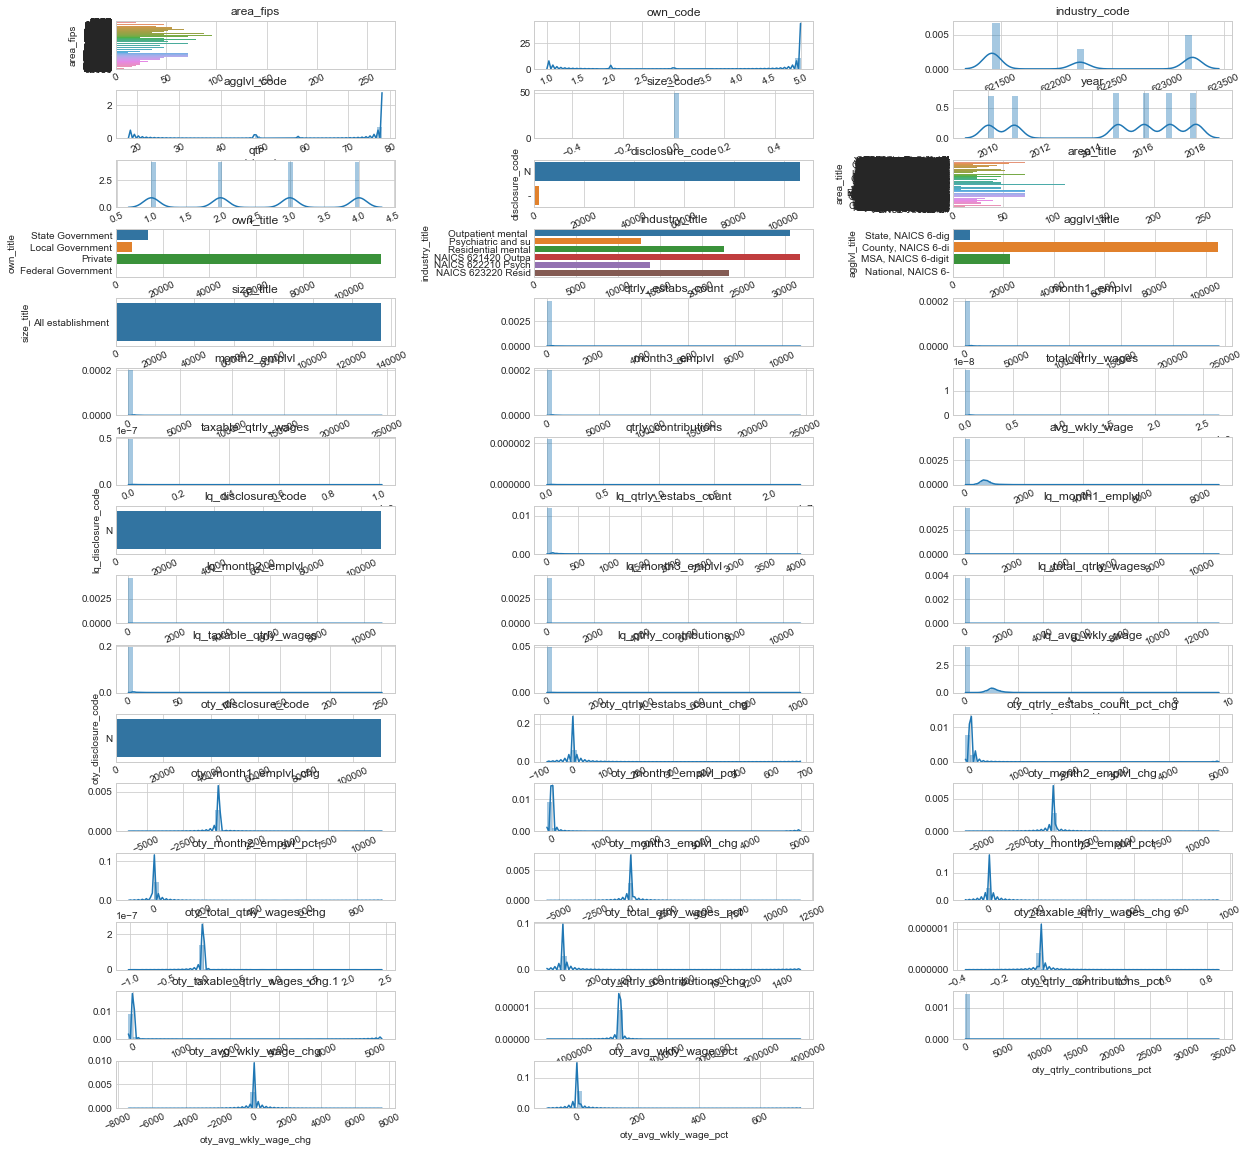

In [12]:
# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(qcew, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)




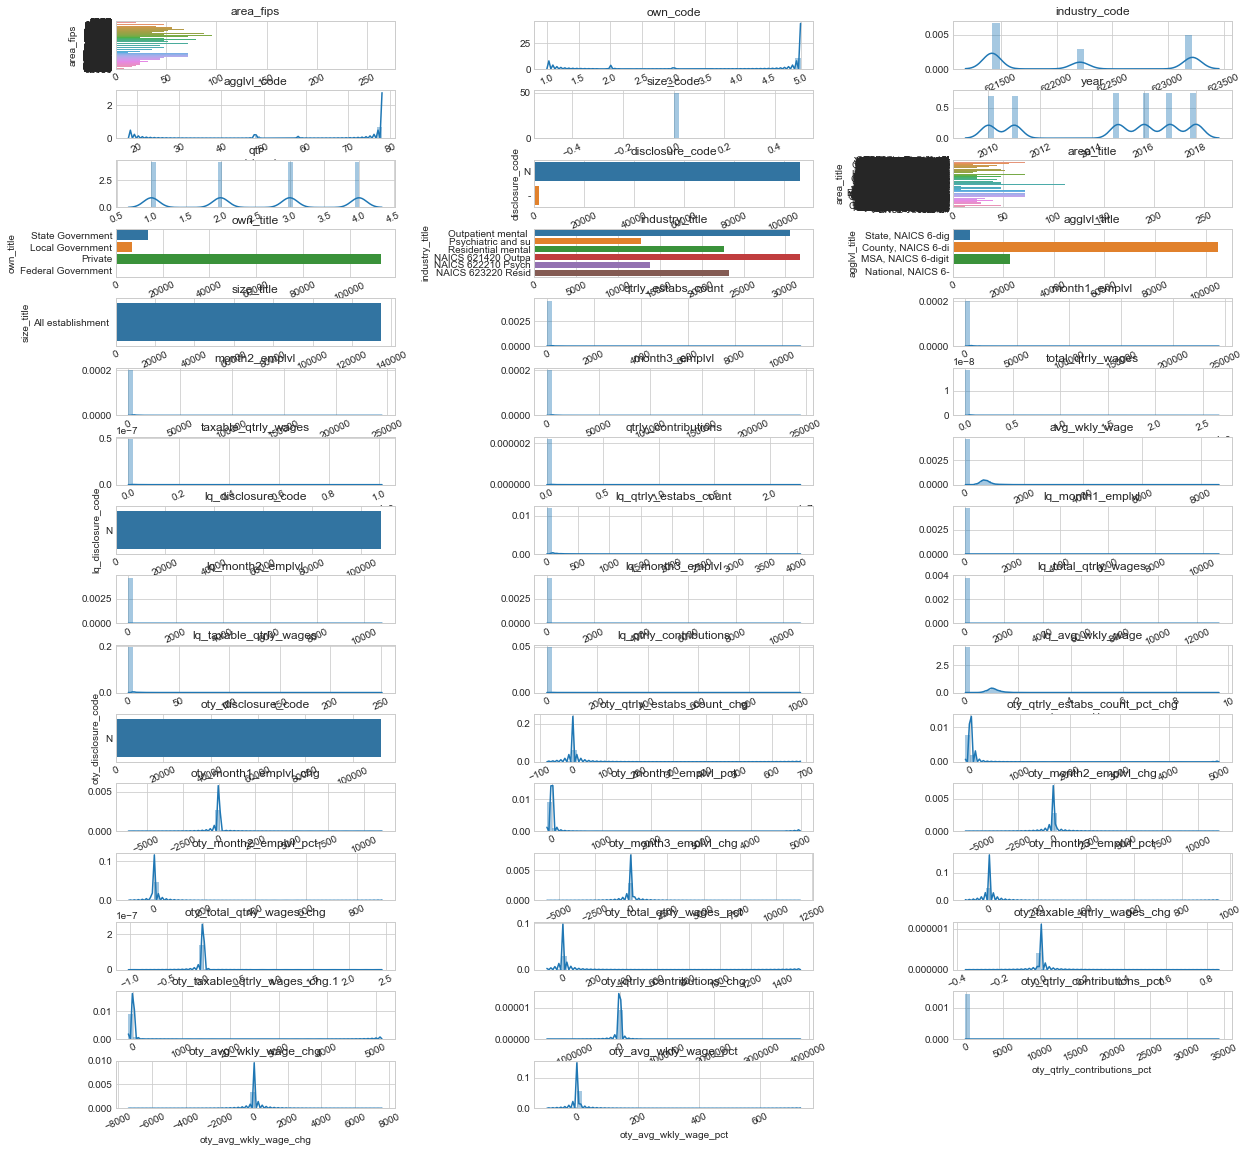

In [13]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
qcew_after=qcew.fillna(qcew.mean())    
plot_distribution(qcew_after, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)



## What missing values are there?

area_fips                             0
own_code                              0
industry_code                         0
agglvl_code                           0
size_code                             0
year                                  0
qtr                                   0
disclosure_code                   26758
area_title                            0
own_title                             0
industry_title                        0
agglvl_title                          0
size_title                            0
qtrly_estabs_count                    0
month1_emplvl                         0
month2_emplvl                         0
month3_emplvl                         0
total_qtrly_wages                     0
taxable_qtrly_wages                   0
qtrly_contributions                   0
avg_wkly_wage                         0
lq_disclosure_code                26758
lq_qtrly_estabs_count                 0
lq_month1_emplvl                      0
lq_month2_emplvl                      0


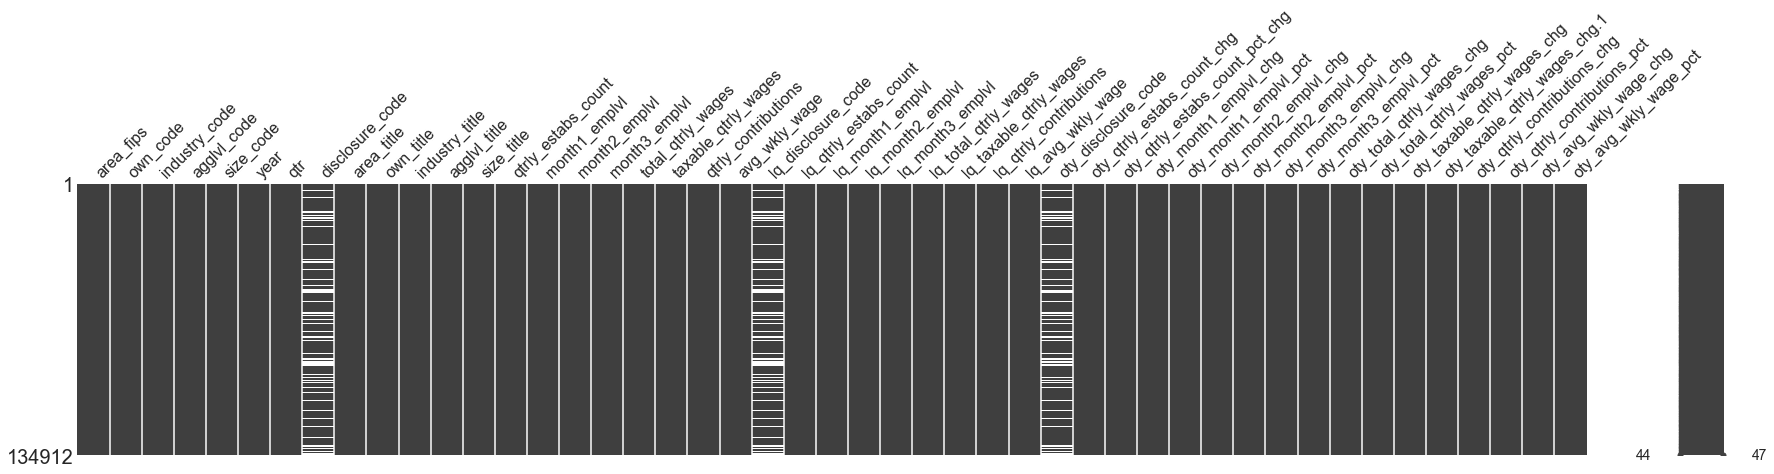

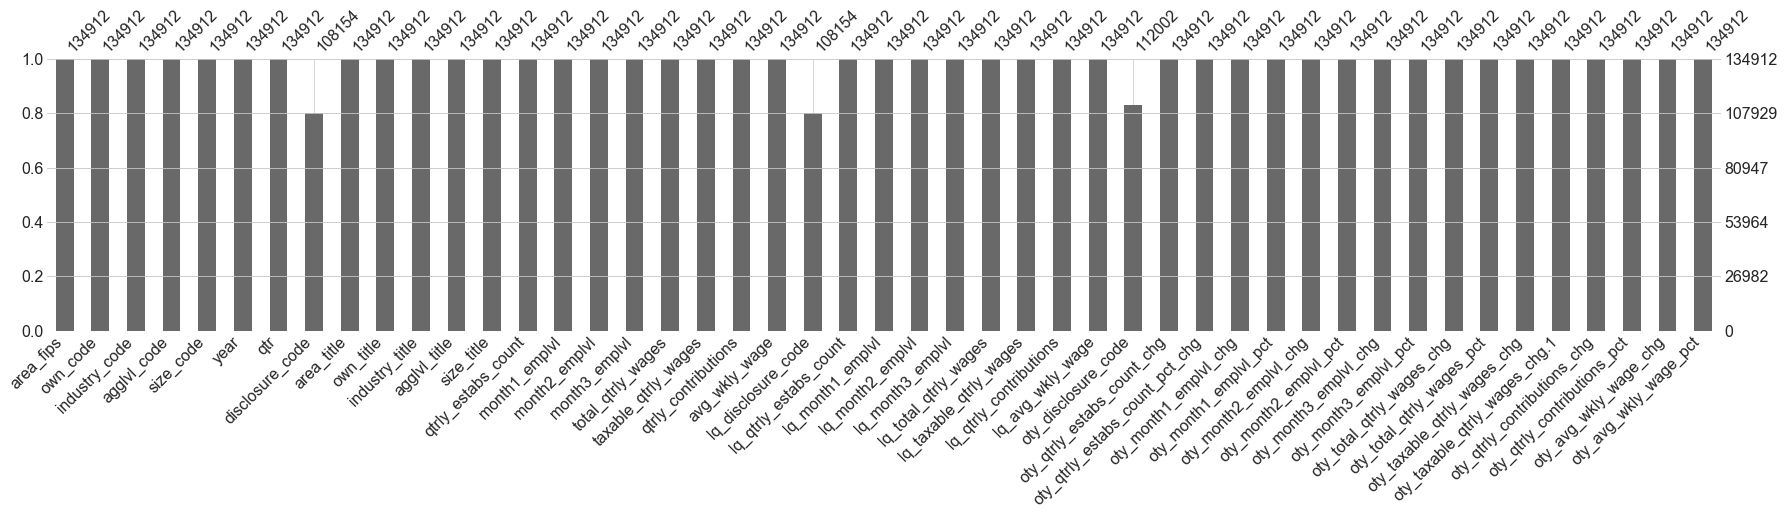

In [14]:
# How many missing values are there in our dataset?
missingno.matrix(qcew, figsize = (30,5))

missingno.bar(qcew, sort='ascending', figsize = (30,5))

## Tabbular format

qcew.isnull().sum()